In [1]:
import gc

import numpy as np
from scipy import fftpack 

In [2]:
from common.fstream import read_matrix
import matplotlib.pyplot as plt

In [45]:
uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_abs.xls')

In [4]:
uvych

array([[5.14409974, 5.14928571, 5.15397383, ..., 3.96254252, 3.93452809,
        3.906502  ],
       [5.09204709, 5.09688758, 5.10124516, ..., 3.93644485, 3.90906111,
        3.88165987],
       [5.04108583, 5.04559862, 5.04964291, ..., 3.91062497, 3.88385401,
        3.85706014],
       ...,
       [2.92678657, 2.92524313, 2.92362454, ..., 2.58636999, 2.5793254 ,
        2.57222987],
       [2.91106069, 2.9095139 , 2.90789338, ..., 2.57461361, 2.56766512,
        2.56066629],
       [2.89551432, 2.89396459, 2.89234254, ..., 2.56296436, 2.55611007,
        2.54920604]])

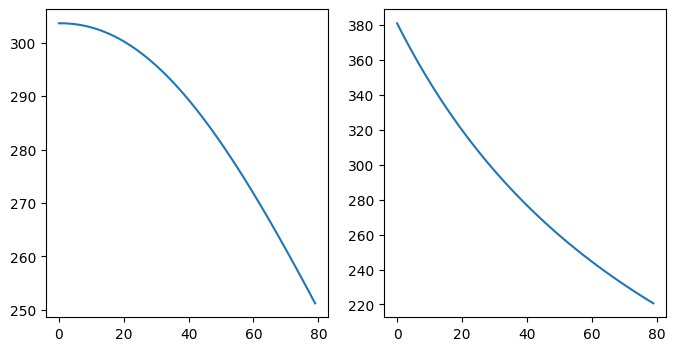

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(np.sum(uvych, axis=0))
axes[1].plot(np.sum(uvych, axis=1))

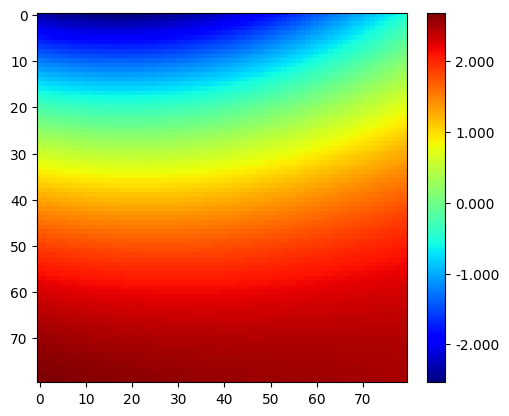

In [45]:
i = plt.imshow(uvych, cmap="jet")
plt.colorbar(i, orientation='vertical', fraction=0.046, pad=0.04, format='%.3f')


In [21]:
noise = np.random.uniform(low=0., high=1.0, size=uvych.shape)
noise

array([[0.17114037, 0.13289352, 0.02787878, ..., 0.784278  , 0.95477816,
        0.53904236],
       [0.6587851 , 0.06891672, 0.53434309, ..., 0.29838701, 0.18027215,
        0.09194124],
       [0.65421335, 0.87124934, 0.61969371, ..., 0.22753509, 0.99611369,
        0.94251907],
       ...,
       [0.20073176, 0.58647157, 0.82551085, ..., 0.16080527, 0.19106889,
        0.04717262],
       [0.91494281, 0.10735416, 0.04685587, ..., 0.41205445, 0.89534315,
        0.21744219],
       [0.76262021, 0.15849945, 0.806302  , ..., 0.63507665, 0.27749364,
        0.70110852]])

In [23]:
uvych

array([[5.14409974, 5.14928571, 5.15397383, ..., 3.96254252, 3.93452809,
        3.906502  ],
       [5.09204709, 5.09688758, 5.10124516, ..., 3.93644485, 3.90906111,
        3.88165987],
       [5.04108583, 5.04559862, 5.04964291, ..., 3.91062497, 3.88385401,
        3.85706014],
       ...,
       [2.92678657, 2.92524313, 2.92362454, ..., 2.58636999, 2.5793254 ,
        2.57222987],
       [2.91106069, 2.9095139 , 2.90789338, ..., 2.57461361, 2.56766512,
        2.56066629],
       [2.89551432, 2.89396459, 2.89234254, ..., 2.56296436, 2.55611007,
        2.54920604]])

In [29]:
uvych_noised = uvych.copy()

for i in range(len(uvych)):
    for j in range(len(uvych[i])):
        ppp = np.random.uniform(low=0, high=0.5)
        uvych_noised[i][j] *= (1 + ppp)
        
uvych_noised

array([[5.18744522, 6.49052453, 7.11904169, ..., 3.98264014, 4.10735412,
        4.69548025],
       [6.6222206 , 7.29091118, 6.78159669, ..., 4.56421241, 4.99731542,
        4.65421884],
       [7.01917529, 6.26315551, 7.4340298 , ..., 4.5895745 , 4.74477982,
        4.5619935 ],
       ...,
       [4.16824698, 3.8649363 , 3.71903614, ..., 2.90943234, 3.65788549,
        2.64066164],
       [3.75104926, 3.68662023, 3.84085715, ..., 2.98025308, 3.51963933,
        3.28241722],
       [4.20538507, 3.52731445, 3.46793361, ..., 2.82983284, 3.3158339 ,
        3.53402062]])

In [44]:
uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_re.xls')

In [43]:
uvych = read_matrix('/home/amedvedev/projects/rust/gcg_rs/output/Uvych_re.xls')


FileNotFoundError: [Errno 2] No such file or directory: '/home/amedvedev/projects/rust/gcg_rs/output/Uvych2_re.xls'

In [38]:

this_pct = 0.001
uvych_sums = get_noised(uvych, this_pct)
n_mean = 0

data = []
data2 = []
x = []

count_observations = 2000

for i in range(count_observations):
    n_mean += 1
    uvych_mean = uvych_sums / n_mean
    data.append(np.max((uvych_mean - uvych) / uvych))
    data2.append(np.abs(uvych - uvych_mean))
    x.append(n_mean)
    uvych_sums += get_noised(uvych, this_pct)

    

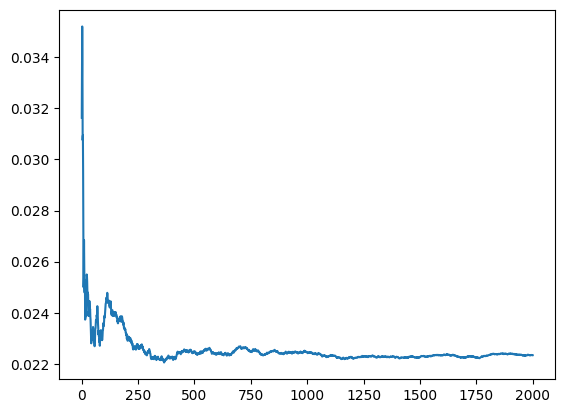

In [34]:
plt.plot(x, [np.max(el) for el in data2])


In [35]:
data[0], data[-1]

(0.0009998845060049007, 0.0005272101988630305)

In [3]:
def load2d(pct=0.01):
    uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_abs.xls')
    
    uvych_noised = uvych.copy()

    for i in range(len(uvych)):
        for j in range(len(uvych[i])):
            ppp = np.random.uniform(low=0, high=pct)
            uvych_noised[i][j] *= (1 + ppp)
                
    return uvych, uvych_noised


def load1d(pct=0.01):
    uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_abs.xls').reshape(80*80,)
    
    uvych_noised = uvych.copy()

    for j in range(len(uvych[i])):
        ppp = np.random.uniform(low=0, high=pct)
        uvych_noised[j] *= (1 + ppp)
                
    return uvych, uvych_noised
    
    
def get_noised(uvych, pct):
    uvych_noised = uvych.copy()
    for i in range(len(uvych)):
        for j in range(len(uvych[i])):
            ppp = np.random.uniform(low=0, high=pct)
            uvych_noised[i][j] *= (1 + ppp)
                    
    return uvych_noised




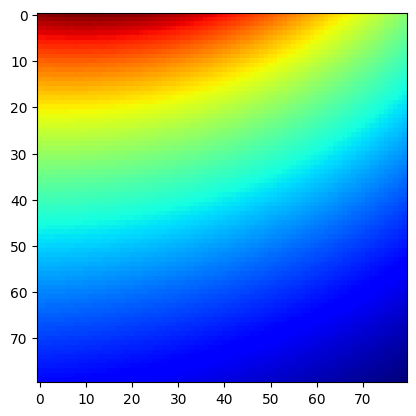

In [49]:
plt.imshow(uvych_noised, cmap="jet")

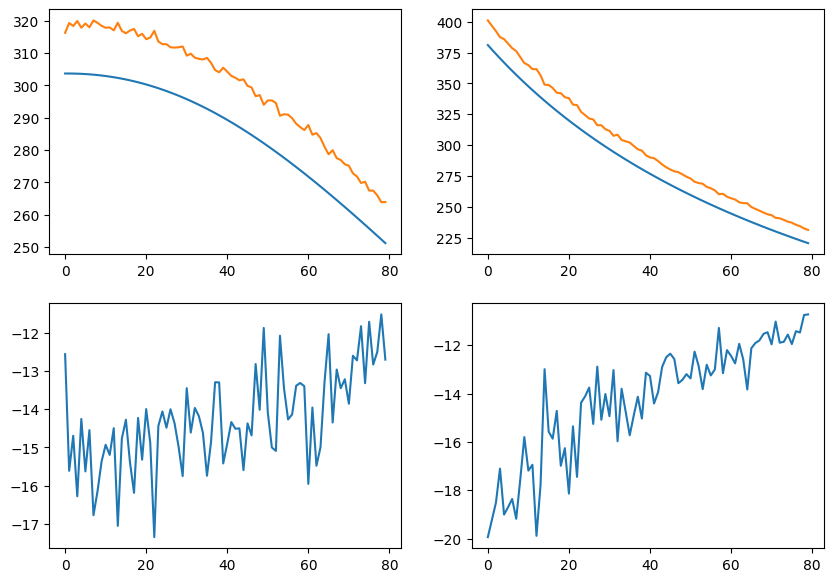

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
axes[0, 0].plot(np.sum(uvych, axis=0))
axes[0, 0].plot(np.sum(uvych_noised, axis=0))
axes[1, 0].plot(np.sum(uvych, axis=0) - np.sum(uvych_noised, axis=0))
axes[0, 1].plot(np.sum(uvych, axis=1))
axes[0, 1].plot(np.sum(uvych_noised, axis=1))
axes[1, 1].plot(np.sum(uvych, axis=1) - np.sum(uvych_noised, axis=1))


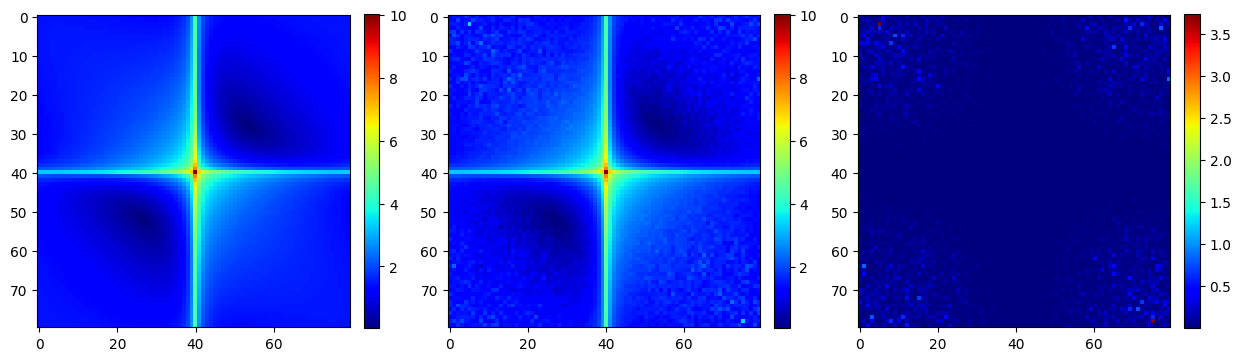

In [50]:
uvych, uvych_noised = load2d(0.001)
# Calculate a 2D power spectrum
psd2D = np.log(fftpack.fftshift( fftpack.fft2(uvych) ))
psd2D_noised = np.log(fftpack.fftshift( fftpack.fft2(uvych_noised) ))
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
i1 = axes[0].imshow( np.abs(psd2D), cmap="jet")
i2 = axes[1].imshow(np.abs(psd2D_noised), cmap="jet")
i3 = axes[2].imshow(((  np.abs(psd2D  -  psd2D_noised) ** 2  )), cmap="jet")
plt.colorbar(i1, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)


In [10]:
import torch

from torch import nn
class UvychDimExpand(nn.Module):
    def __init__(self, size, hidden_sizes):
        super(UvychDimExpand, self).__init__()
        
        self.size = size
        self.hidden_sizes = hidden_sizes

        self.layers = nn.ModuleList(
            [
                nn.Linear(size, hidden_sizes[0]),
                nn.LeakyReLU()
            ]
            +
            [
                nn.Sequential(
                    nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                    nn.LeakyReLU()

                )
                for i in range(1, len(hidden_sizes))
            ]
            +
            [
                nn.Linear(hidden_sizes[-1], size)
            ]
        )


    def forward(self, x):
        for i in range(len(self.layers)):
            x = self.layers[i](x)
        return x
    

Max Err: 0.002228290822253065
Mean Err: 0.0007470825622437627


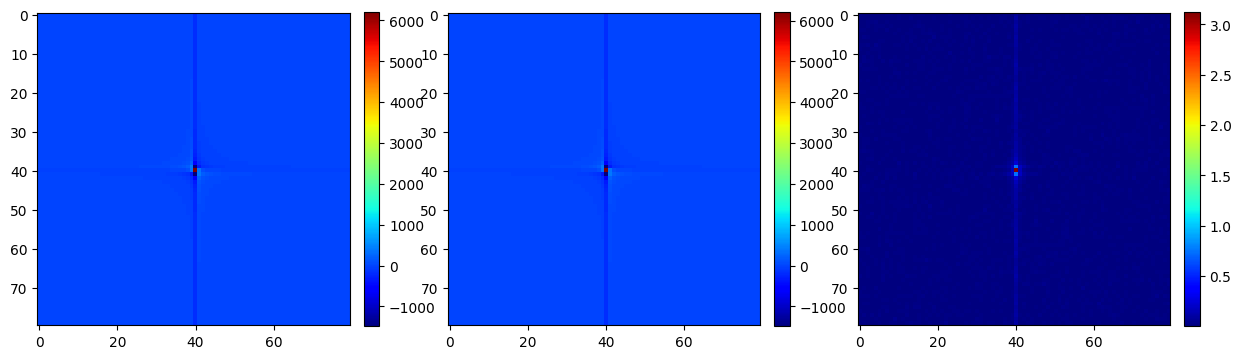

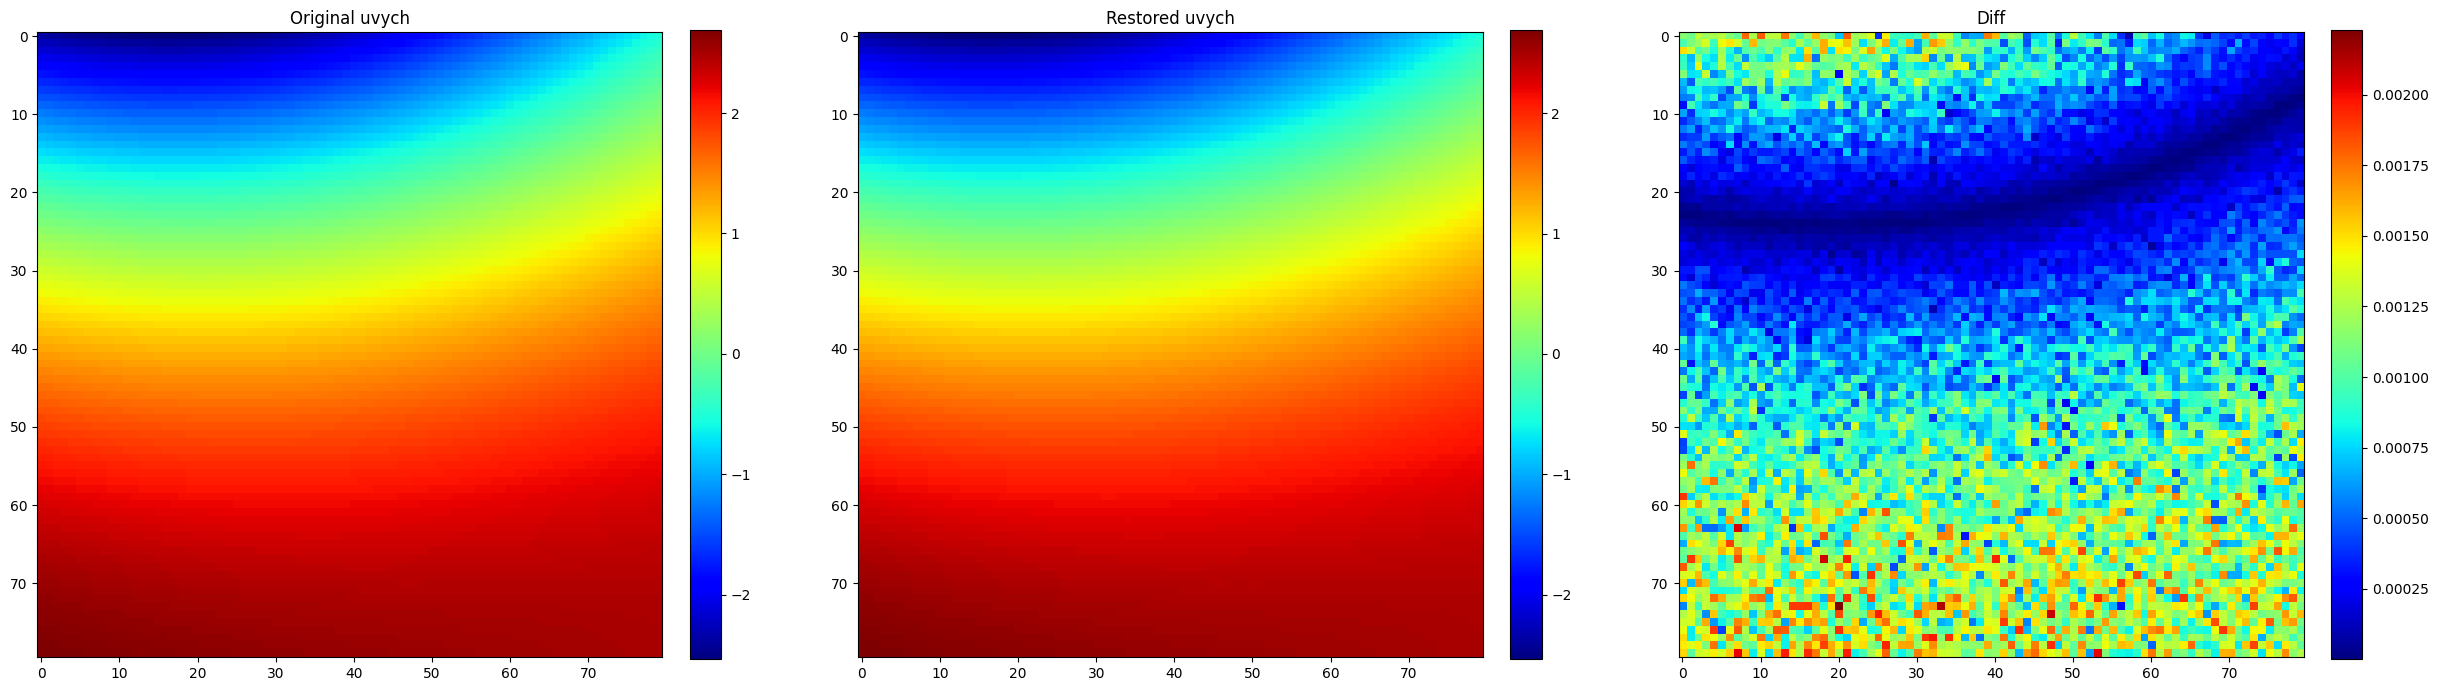

In [23]:
step_pct = 0.001

def f1(x):
    return fftpack.fftshift(fftpack.fft2(x))

def g1(x):
    return fftpack.ifft2(fftpack.ifftshift(x))

def f(x):
    return f1(x)

def g(x):
    return g1(x)


uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_re.xls')

# Calculate a 2D power spectrum
psd2D = f(uvych)
k = 5
psd2D_noised = sum([f(get_noised(uvych, step_pct)) for _ in range(k)]) / k

uvych_restored = g(psd2D_noised).real

print("Max Err:", np.max(np.abs(uvych - uvych_restored)))
print("Mean Err:", np.mean(np.abs(uvych - uvych_restored)))

fig, axes = plt.subplots(1, 3, figsize=(15, 7))
i1 = axes[0].imshow( psd2D.real, cmap="jet")
i2 = axes[1].imshow(psd2D_noised.real, cmap="jet")
i3 = axes[2].imshow(((  np.abs(psd2D.real  -  psd2D_noised.real) )), cmap="jet")
plt.colorbar(i1, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))


axes[1].set_title("Restored uvych")
i2 = axes[1].imshow(uvych_restored.real, cmap="jet")
axes[0].set_title("Original uvych")

i3 = axes[0].imshow(uvych, cmap="jet")

axes[2].set_title("Diff")

i4 = axes[2].imshow(np.abs(uvych - uvych_restored), cmap="jet")

plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)
plt.show()

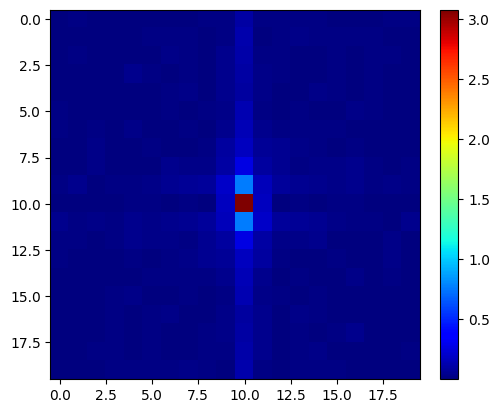

In [9]:
_ = plt.imshow(((  np.abs(psd2D.real  -  psd2D_noised.real)   )[30:50, 30:50]), cmap="jet")
plt.colorbar(_, orientation='vertical', fraction=0.046, pad=0.04)

In [29]:
def filter_f(fft_repr):
    fft_denoiser_model_real = torch.load("../assets/pt/uvych_matrix_denoiser_20.pt").to(torch.device("cpu")).eval()
    fft_denoiser_model_imag = torch.load("../assets/pt/uvych_matrix_denoiser_21_im.pt").to(torch.device("cpu")).eval()
    real_filtered = fft_denoiser_model_real(
        torch.tensor(
            np.array(fft_repr.real).ravel().reshape(1, 80 * 80), dtype=torch.float
        )
    ).cpu().detach().numpy().squeeze().reshape(80, 80) 
    imag_filtered = fft_denoiser_model_imag(
        torch.tensor(
            np.array(fft_repr.imag).ravel().reshape(1, 80 * 80), dtype=torch.float
        )
    ).cpu().detach().numpy().squeeze().reshape(80, 80) 
    
    z = np.array(real_filtered, dtype=np.complex64)
    z.imag = imag_filtered
    
    return z
    

In [30]:
psd2d_denoised = filter_f(psd2D_noised)
psd2d_denoised

array([[-15.464212   -7.146033j , -13.732139  +30.145159j ,
         18.040207   +3.5807874j, ...,  15.647733  +27.018032j ,
        -10.836986   +7.4770255j,  -6.015759  -11.672656j ],
       [  0.07626904-15.474971j ,   3.9481325  -3.5079484j,
          4.8442264 +16.208195j , ...,  -1.674026   +1.6366678j,
         27.348112  +12.325058j ,  -5.4776955  +5.5315027j],
       [ 14.688016  -28.450209j ,  -2.6347213 -10.178781j ,
          7.911545  -10.99511j  , ...,  18.786205  -18.29098j  ,
         14.653103   +7.249747j ,  27.551416   +6.4881105j],
       ...,
       [  7.78321    -1.611931j ,  10.151998  +14.731726j ,
         27.34221    +1.7563715j, ...,  -8.858358  +10.2787j   ,
        -13.815867  -30.828465j ,  20.57183   -10.2065325j],
       [  3.8048093 +11.100404j ,   7.570759   -9.012422j ,
         10.929708  +14.35253j  , ..., -11.167098  +23.268673j ,
        -12.595786  -14.795434j ,  10.843786   +3.0506778j],
       [ 21.53002   +10.201984j ,   4.3840384 +11.241547j 

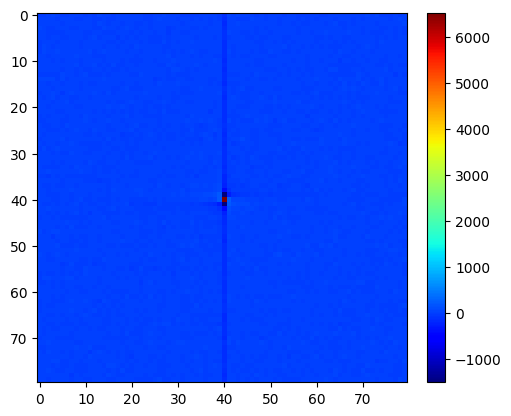

In [31]:
_ = plt.imshow((  psd2d_denoised.real   ), cmap="jet")
plt.colorbar(_, orientation='vertical', fraction=0.046, pad=0.04)

Max Err: 1.279635365336814
Mean Err: 0.22170344714760315


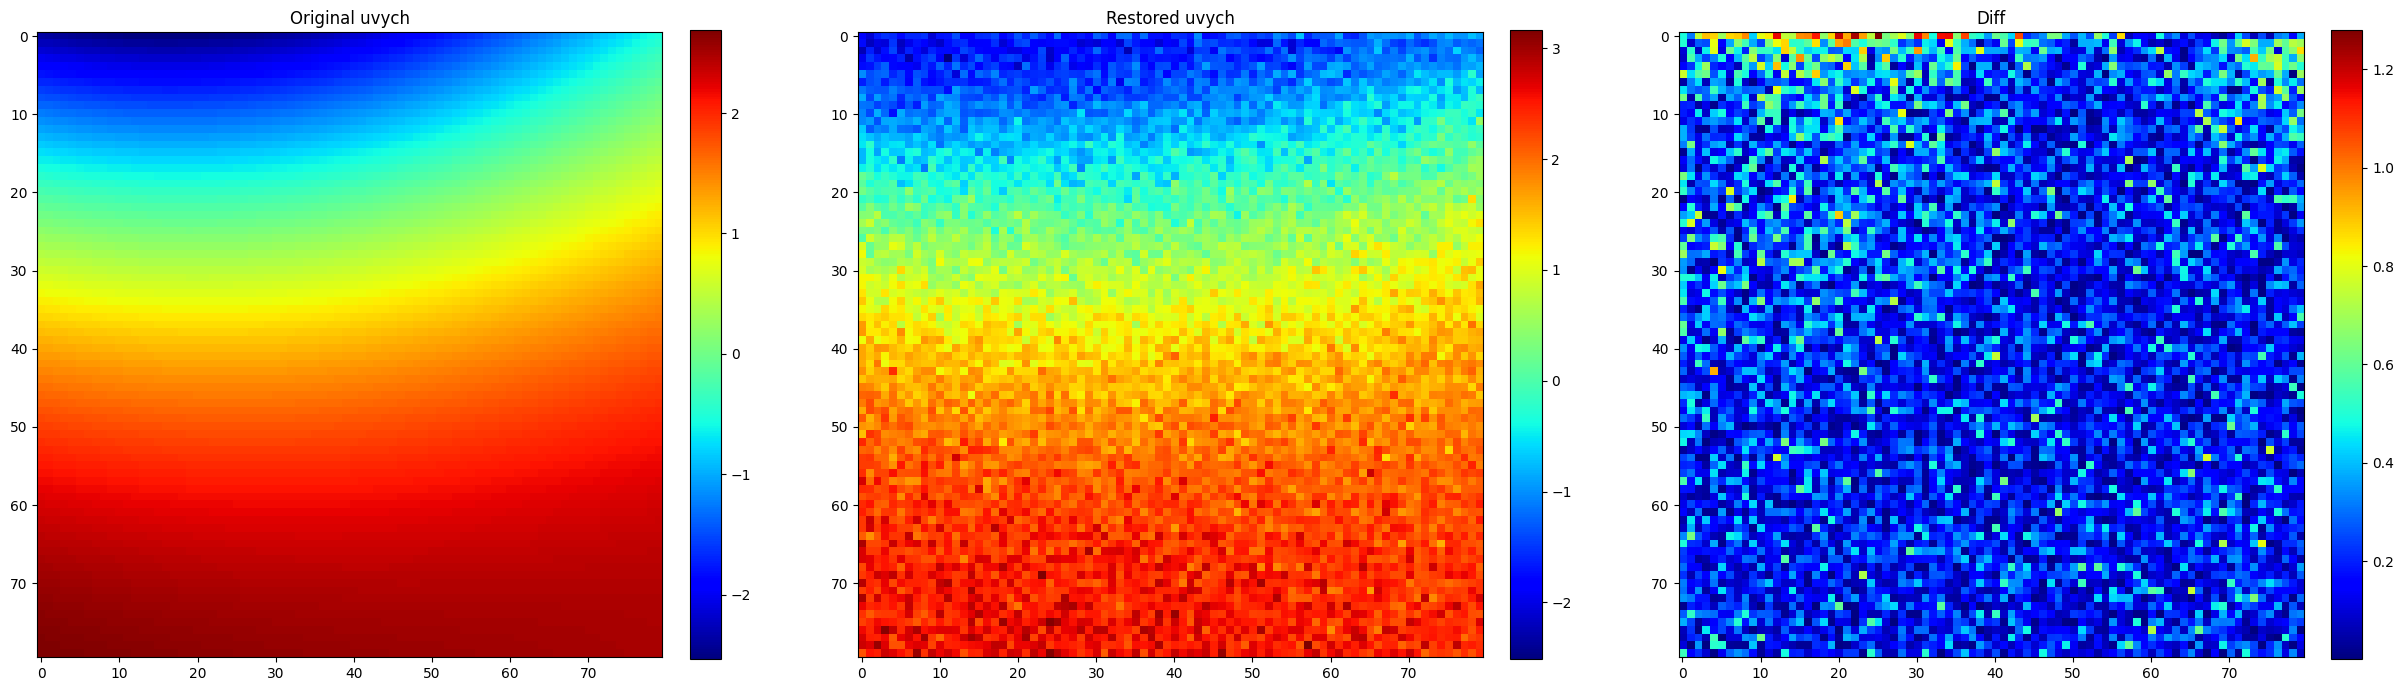

In [32]:

uvych_restored = g(psd2d_denoised).real

print("Max Err:", np.max(np.abs(uvych - uvych_restored)))
print("Mean Err:", np.mean(np.abs(uvych - uvych_restored)))


fig, axes = plt.subplots(1, 3, figsize=(30, 10))


axes[1].set_title("Restored uvych")
i2 = axes[1].imshow(uvych_restored.real, cmap="jet")
axes[0].set_title("Original uvych")

i3 = axes[0].imshow(uvych, cmap="jet")

axes[2].set_title("Diff")

i4 = axes[2].imshow(np.abs(uvych - uvych_restored), cmap="jet")

plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)
plt.show()

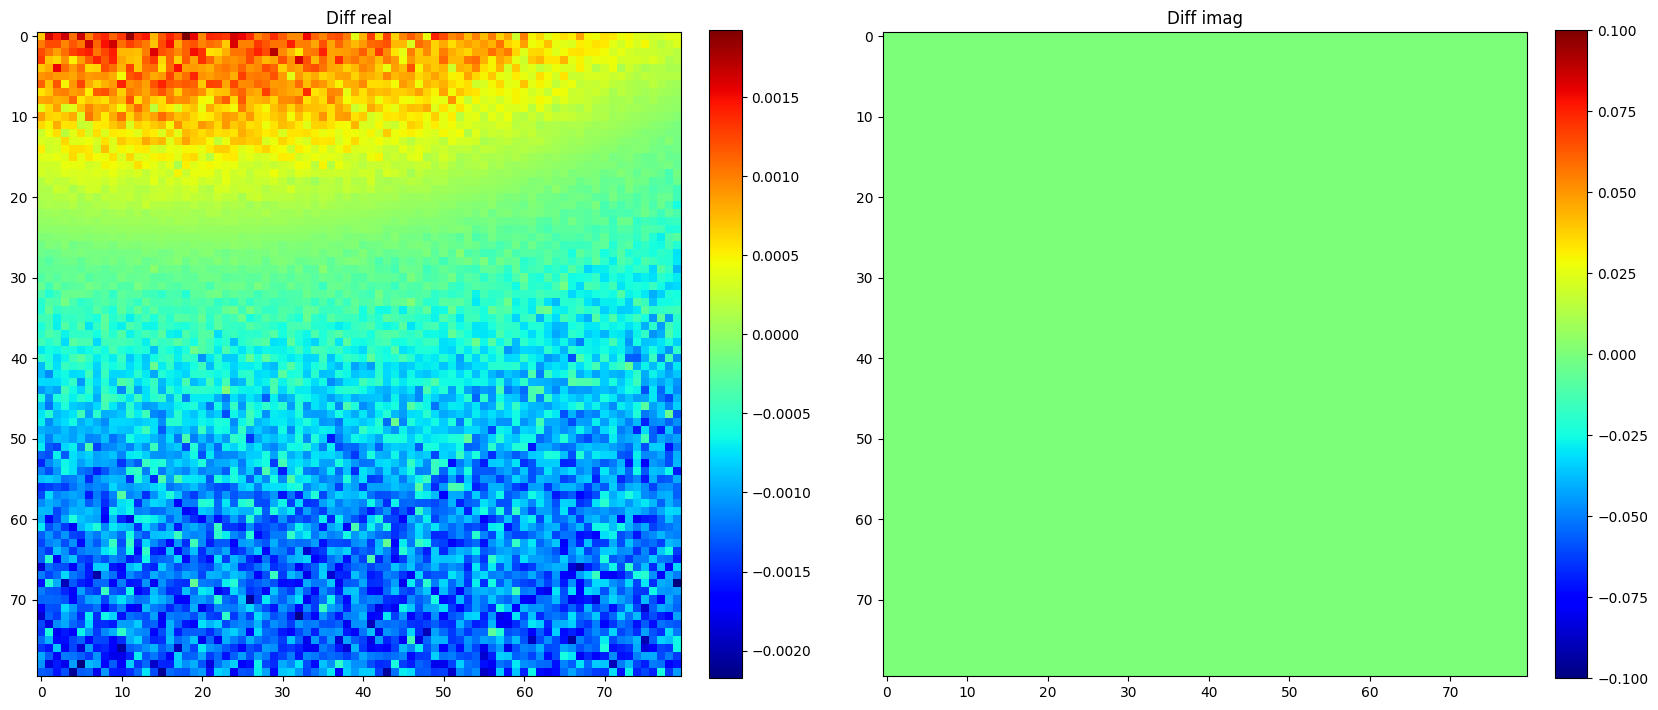

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title("Diff real")

i3 = axes[0].imshow((uvych - uvych_restored).real, cmap="jet")

axes[1].set_title("Diff imag")

i4 = axes[1].imshow((uvych - uvych_restored).imag, cmap="jet")

plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)

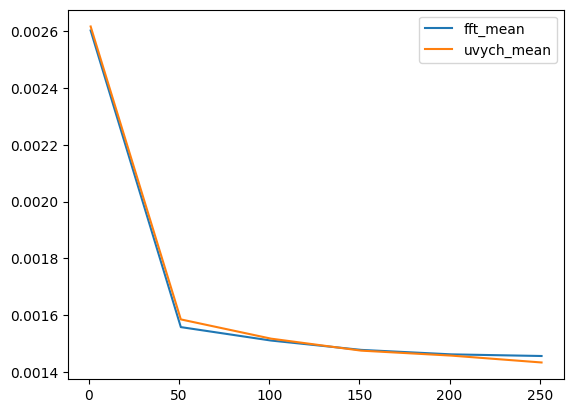

40515

In [60]:
def get_err_rest_fft(uvych, step_pct, k, f, g):
    psd2D_noised = sum([f(get_noised(uvych, step_pct)) for _ in range(k)]) / k
    uvych_restored = g(psd2D_noised)
    return np.max(np.abs(uvych - uvych_restored))


def get_err_rest(uvych, step_pct, k):
    uvych_restored = sum([get_noised(uvych, step_pct) for _ in range(k)]) / k
    return np.max(np.abs(uvych - uvych_restored))


step_pct = 0.001

def f(x):
    return fftpack.fftshift(fftpack.fft2(x))

def g(x):
    return fftpack.ifft2(fftpack.ifftshift(x))

uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_re.xls')

xs = np.arange(1, 300, 50)
ys1 = [get_err_rest_fft(uvych, step_pct, k, f, g) for k in xs]
ys2 = [get_err_rest(uvych, step_pct, k) for k in xs]

plt.plot(xs, ys1, label="fft_mean")
plt.plot(xs, ys2, label="uvych_mean")
plt.legend()
plt.show()

gc.collect()

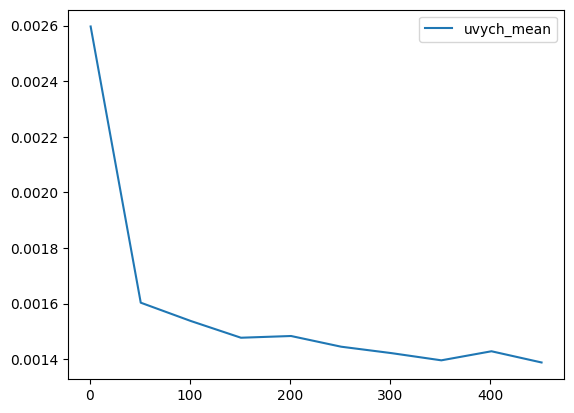

3542

In [43]:
plt.plot(xs, ys2, label="uvych_mean")
plt.legend()
plt.show()

gc.collect()

Max Err: 0.0013902761517359252
Mean Err: 0.0007457187509133279


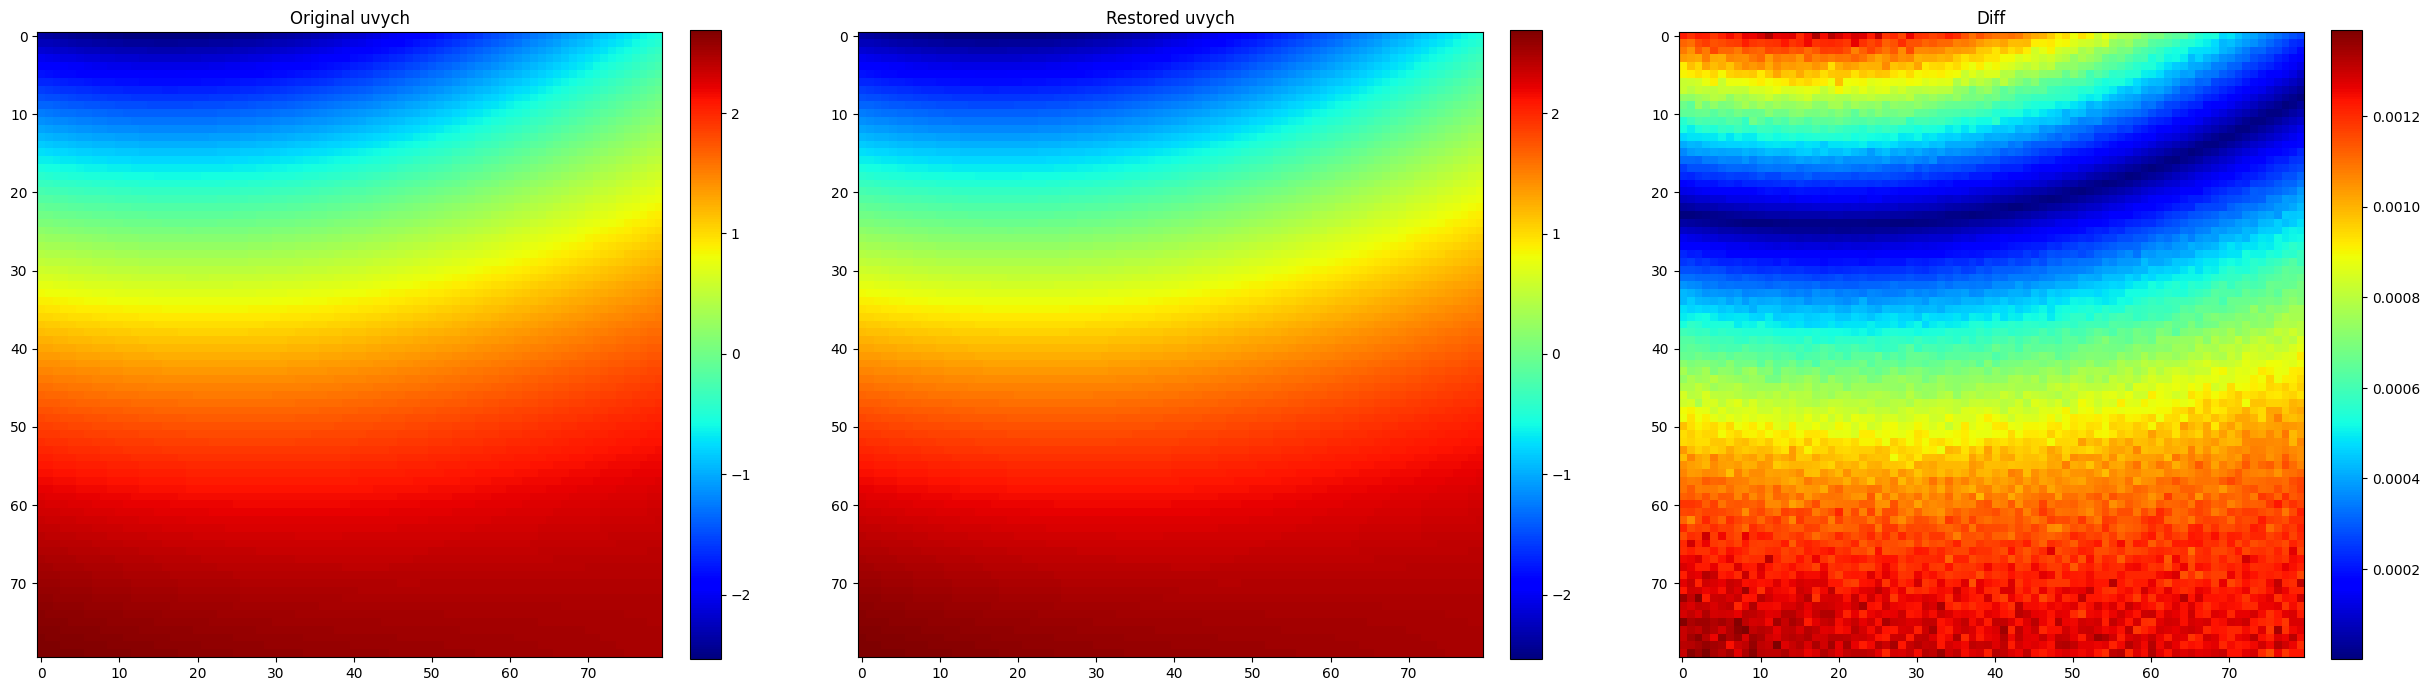

In [56]:
step_pct = 0.001

# Calculate a 2D power spectrum
k = 500
uvych_restored = sum([get_noised(uvych, step_pct) for _ in range(k)]) / k


print("Max Err:", np.max(np.abs(uvych - uvych_restored)))
print("Mean Err:", np.mean(np.abs(uvych - uvych_restored)))


fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[1].set_title("Restored uvych")
i2 = axes[1].imshow(uvych_restored.real, cmap="jet")
axes[0].set_title("Original uvych")

i3 = axes[0].imshow(uvych, cmap="jet")

axes[2].set_title("Diff")

i4 = axes[2].imshow(np.abs(uvych - uvych_restored), cmap="jet")

plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)
plt.show()


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title("Diff real")

i3 = axes[0].imshow((uvych - uvych_restored).real, cmap="jet")

axes[1].set_title("Diff imag")

i4 = axes[1].imshow((uvych - uvych_restored).imag, cmap="jet")

plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)

In [36]:
def fft2d_transform(path):
    x = read_matrix(path)
    t =  fftpack.fftshift( fftpack.fft2(x) / 80)
    return (t.real, t.imag)

import torch
model_re = torch.load("../assets/pt/uvych_fft_fftshift_matrix_re.pt").eval() # uvych_matrix_denoiser_16
model_im = torch.load("../assets/pt/uvych_fft_fftshift_matrix_im.pt").eval()

In [37]:
uvych_inp_data = fft2d_transform('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_noised_abs.xls')

with torch.no_grad():
    inp_re_filtered = model_re(torch.tensor(uvych_inp_data[0].reshape(1, 1, 80, 80), dtype=torch.float, device="cuda")).cpu().detach().numpy().reshape(80, 80)
    inp_im_filtered = model_im(torch.tensor(uvych_inp_data[1].reshape(1, 1, 80, 80), dtype=torch.float, device="cuda")).cpu().detach().numpy().reshape(80, 80)


comn = np.empty((80,80),dtype=np.complex64)
comn.real = uvych_inp_data[0]
comn.imag = uvych_inp_data[1]

com = np.empty((80,80),dtype=np.complex64)
com.real = inp_re_filtered
com.imag = inp_im_filtered

noised = fftpack.ifft2(fftpack.ifftshift(comn) * 80.)
orig = fftpack.ifft2(fftpack.ifftshift(com) * 80.)



0.01774533967958338
0.0051311163402430245
0.04959624117616013
0.0477986602179481


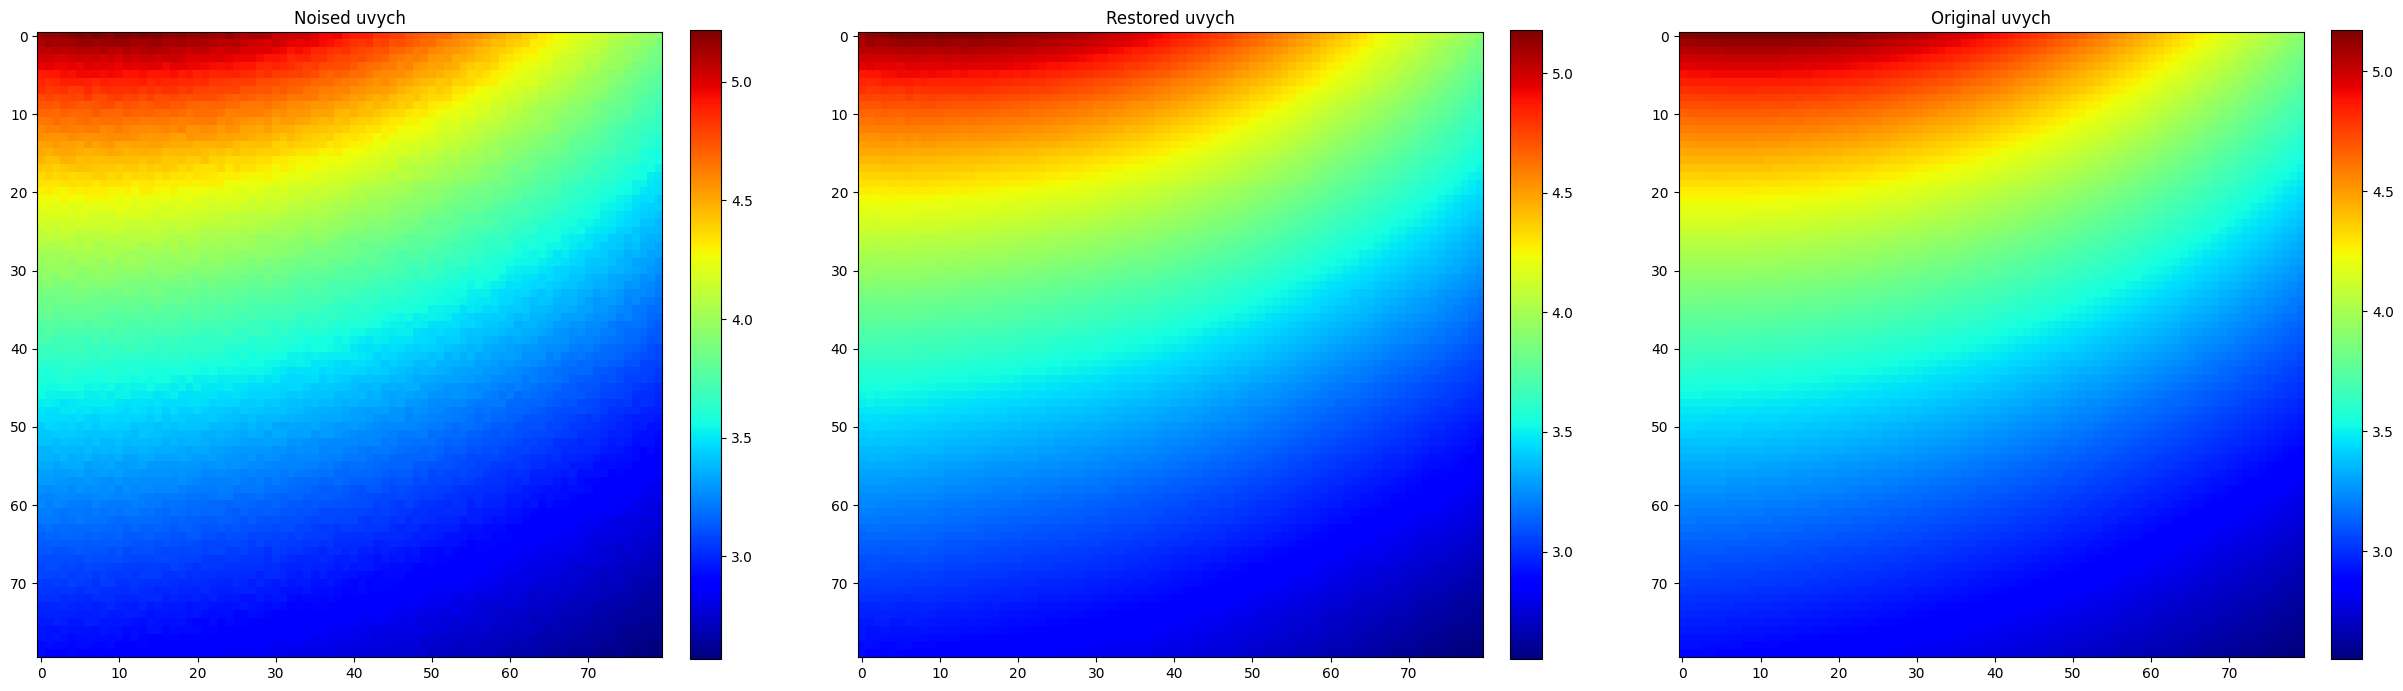

In [38]:
uvych = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_abs.xls')
uvych_noised  = read_matrix('/home/amedvedev/projects/python/DenoisingCNN/data/datasets/gcg19/val/calculations/e4c7c992-77e0-428d-957c-5a483cea756d/Uvych2_noised_abs.xls')

print(np.mean(np.abs(uvych_noised - uvych)))
print(np.mean(np.abs(orig.real - uvych)))

print(np.max(np.abs(uvych_noised - uvych)))
print(np.max(np.abs(orig.real - uvych)))

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

axes[0].set_title("Noised uvych")
i1 = axes[0].imshow( noised.real, cmap="jet")
axes[1].set_title("Restored uvych")
    
i2 = axes[1].imshow(orig.real, cmap="jet")
axes[2].set_title("Original uvych")

i3 = axes[2].imshow(uvych, cmap="jet")

plt.colorbar(i1, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i2, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i3, orientation='vertical', fraction=0.046, pad=0.04)


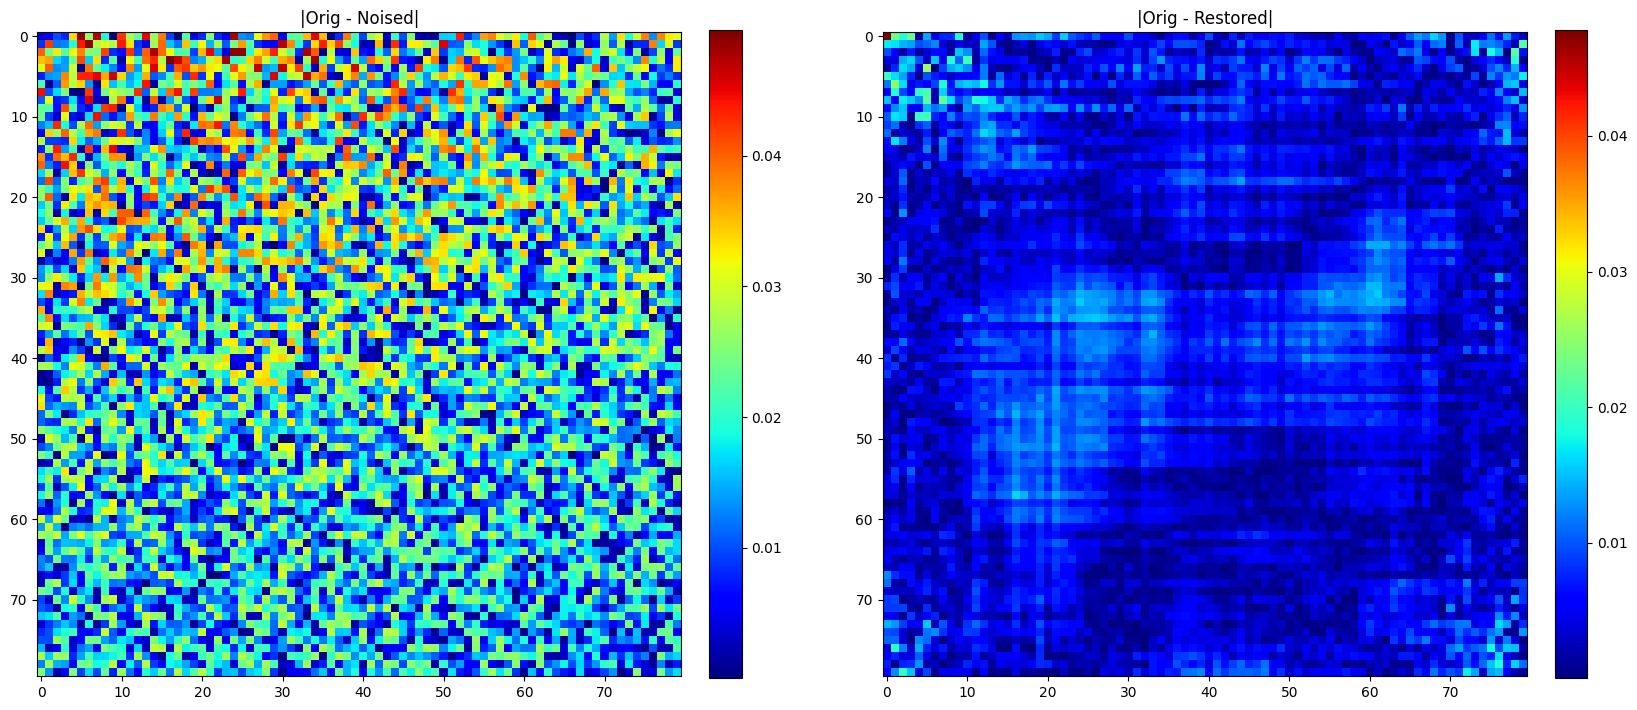

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title("|Orig - Noised|")
i4 = axes[0].imshow((np.abs(  uvych  -  uvych_noised )), cmap="jet")
axes[1].set_title("|Orig - Restored|")
i5 = axes[1].imshow((np.abs(  uvych  -  orig.real )), cmap="jet")

plt.colorbar(i4, orientation='vertical', fraction=0.046, pad=0.04)
plt.colorbar(i5, orientation='vertical', fraction=0.046, pad=0.04)

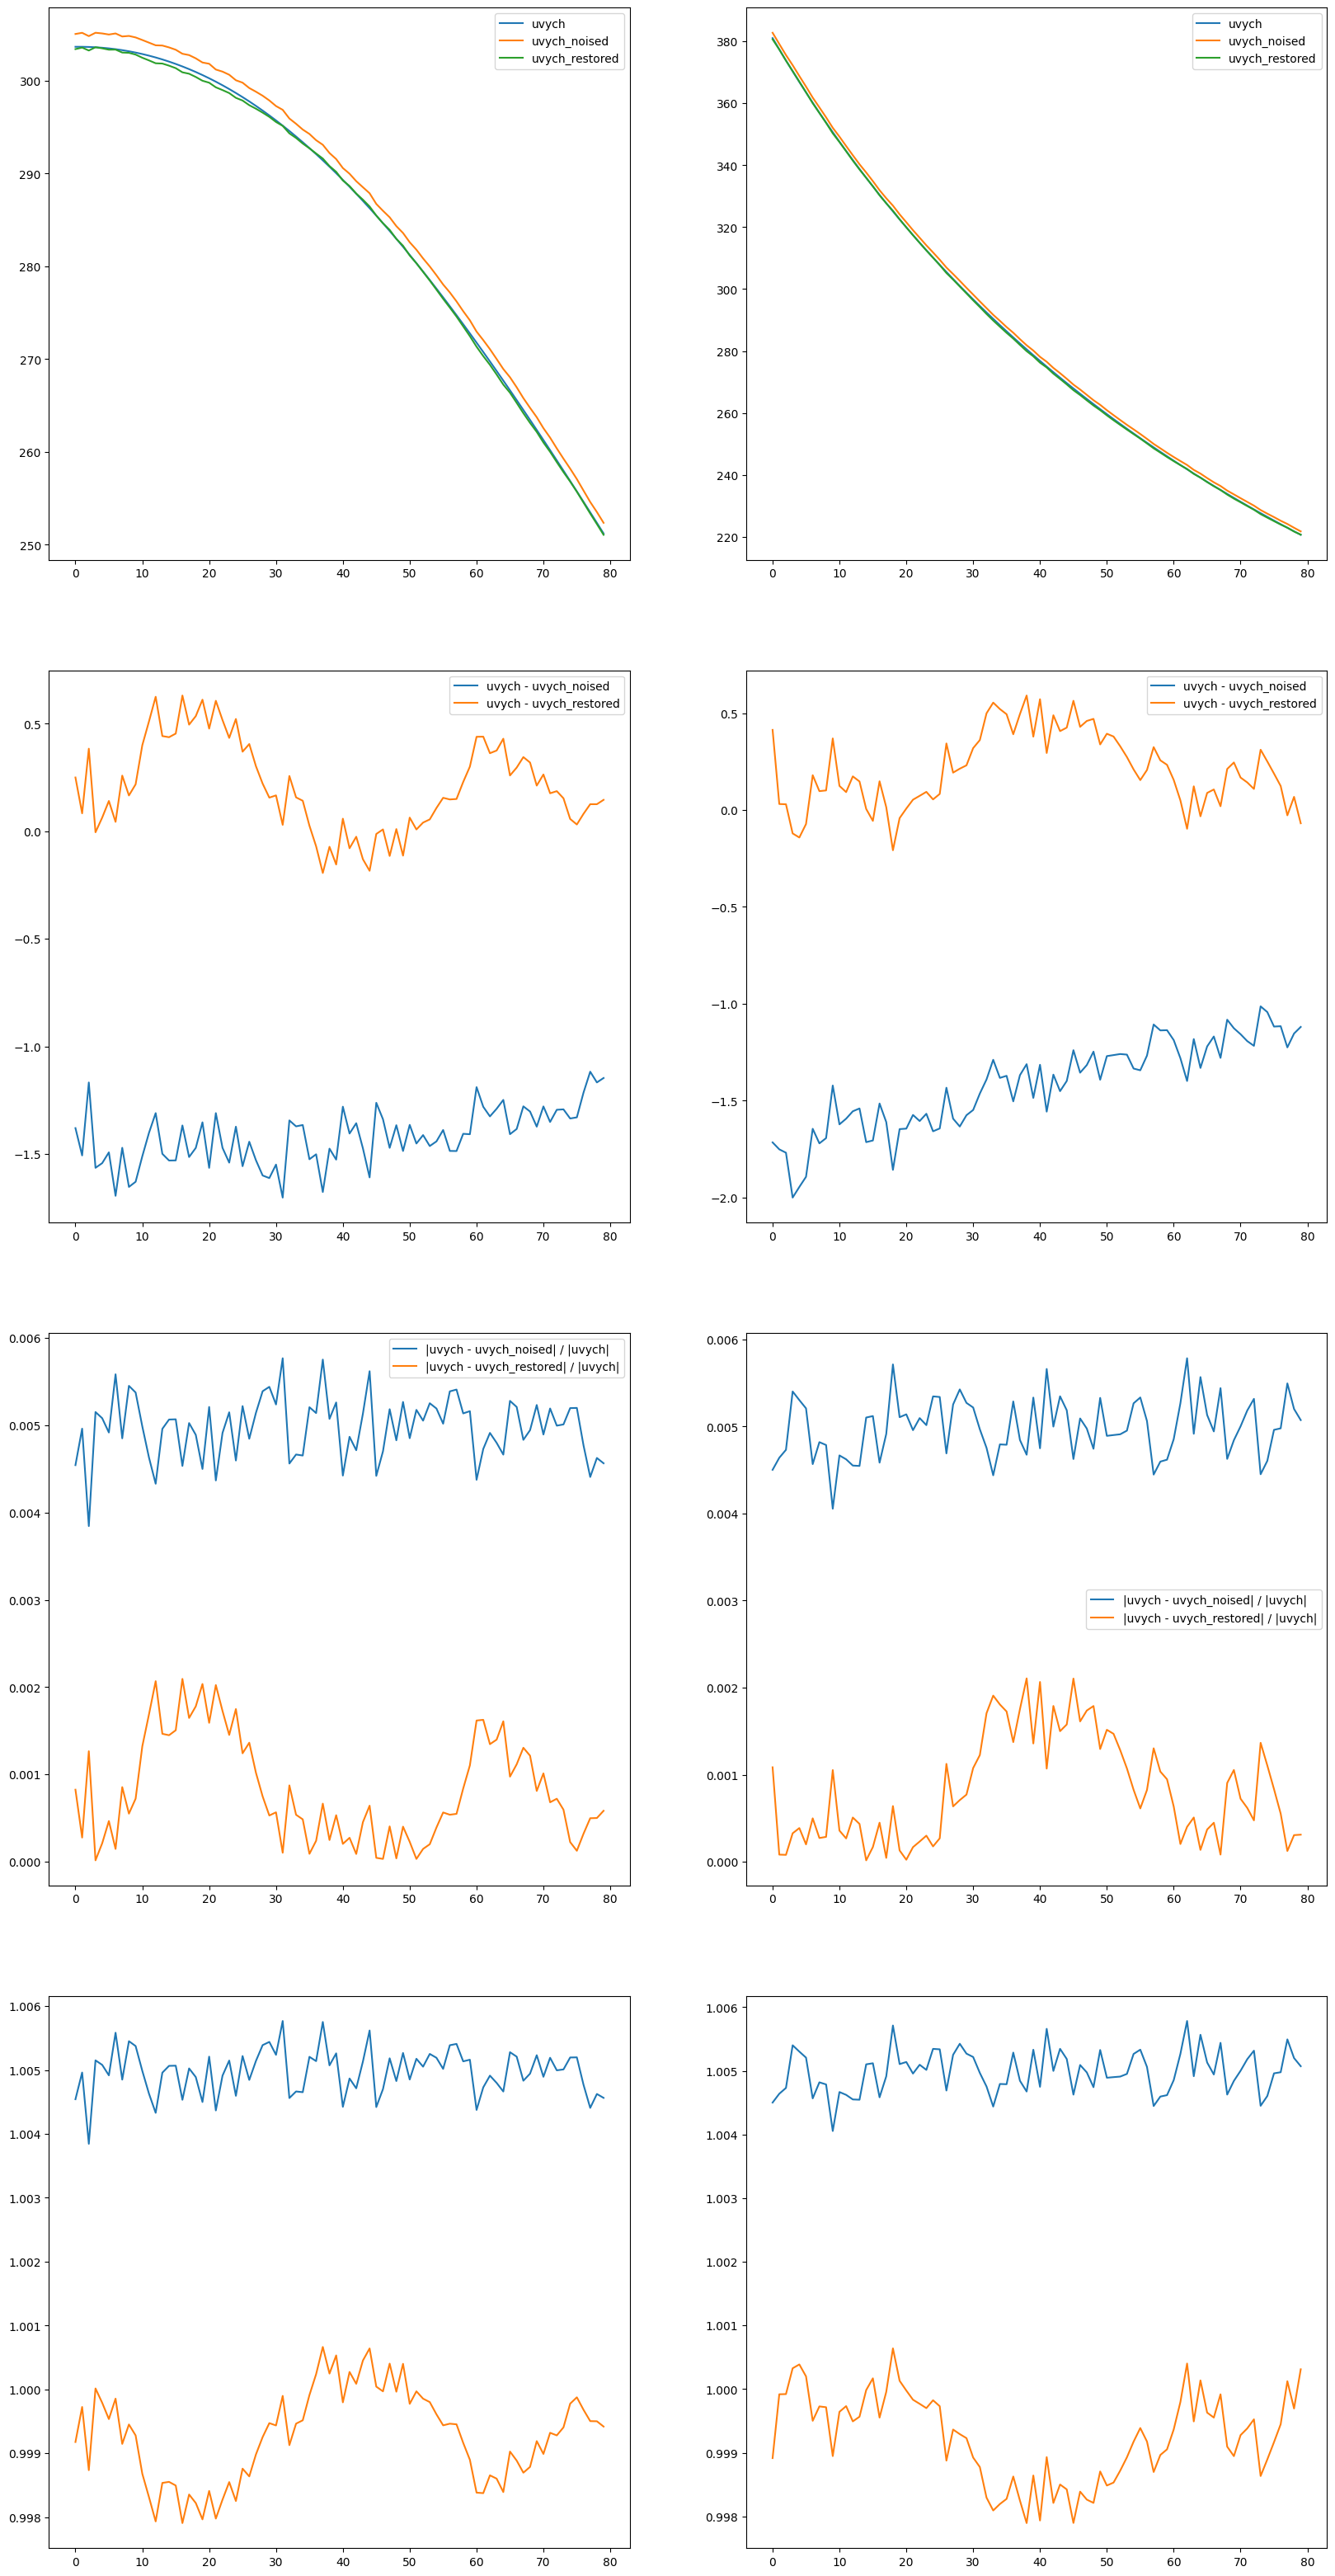

In [40]:
fig, axes = plt.subplots(4, 2, figsize=(20, 40))
axes[0, 0].plot(np.sum(uvych, axis=0), label="uvych")
axes[0, 0].plot(np.sum(uvych_noised, axis=0), label="uvych_noised")
axes[0, 0].plot(np.sum(orig.real, axis=0), label="uvych_restored")
axes[1, 0].plot(np.sum(uvych, axis=0) - np.sum(uvych_noised, axis=0), label="uvych - uvych_noised")
axes[1, 0].plot(np.sum(uvych, axis=0) - np.sum(orig.real, axis=0), label="uvych - uvych_restored")
axes[0, 1].plot(np.sum(uvych, axis=1), label="uvych")
axes[0, 1].plot(np.sum(uvych_noised, axis=1), label="uvych_noised")
axes[0, 1].plot(np.sum(orig.real, axis=1), label="uvych_restored")
axes[1, 1].plot(np.sum(uvych, axis=1) - np.sum(uvych_noised, axis=1), label="uvych - uvych_noised")
axes[1, 1].plot(np.sum(uvych, axis=1) - np.sum(orig.real, axis=1), label="uvych - uvych_restored")


axes[2, 0].plot(np.abs(np.sum(uvych, axis=0) - np.sum(uvych_noised, axis=0)) / np.abs(np.sum(uvych, axis=0)), label="|uvych - uvych_noised| / |uvych|")
axes[2, 0].plot(np.abs(np.sum(uvych, axis=0) - np.sum(orig.real, axis=0)) / np.abs(np.sum(uvych, axis=0)), label="|uvych - uvych_restored| / |uvych|")

axes[2, 1].plot(np.abs(np.sum(uvych, axis=1) - np.sum(uvych_noised, axis=1)) / np.abs(np.sum(uvych, axis=1)), label="|uvych - uvych_noised| / |uvych|")
axes[2, 1].plot(np.abs(np.sum(uvych, axis=1) - np.sum(orig.real, axis=1)) / np.abs(np.sum(uvych, axis=1)), label="|uvych - uvych_restored| / |uvych|")

axes[3, 0].plot(np.abs( np.sum(uvych_noised, axis=0)) / np.abs(np.sum(uvych, axis=0)), label="|uvych_noised| / |uvych|")
axes[3, 0].plot(np.abs( np.sum(orig.real, axis=0)) / np.abs(np.sum(uvych, axis=0)), label="|uvych_restored| / |uvych|")

axes[3, 1].plot(np.abs( np.sum(uvych_noised, axis=1)) / np.abs(np.sum(uvych, axis=1)), label="| uvych_noised| / |uvych|")
axes[3, 1].plot(np.abs( np.sum(orig.real, axis=1)) / np.abs(np.sum(uvych, axis=1)), label="|uvych_restored| / |uvych|")

for i in range(3):
    for j in range(2):
        axes[i, j].legend()

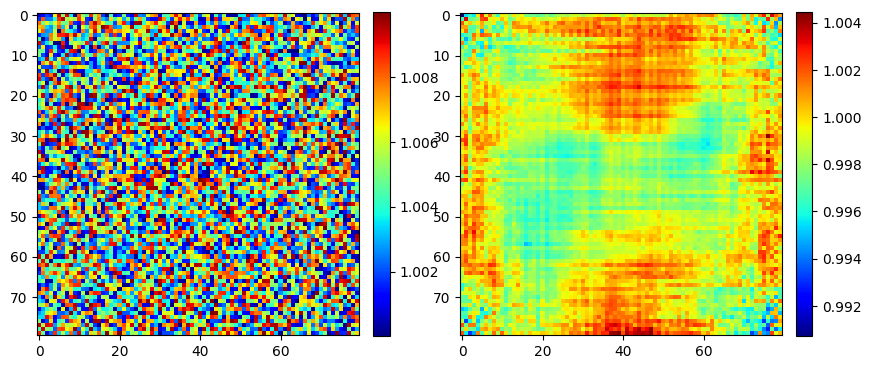

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

i = axes[0].imshow(uvych_noised/ uvych, cmap="jet")
plt.colorbar(i, orientation='vertical', fraction=0.046, pad=0.04, format='%.3f')
i = axes[1].imshow(orig.real / uvych, cmap="jet")
plt.colorbar(i, orientation='vertical', fraction=0.046, pad=0.04, format='%.3f')



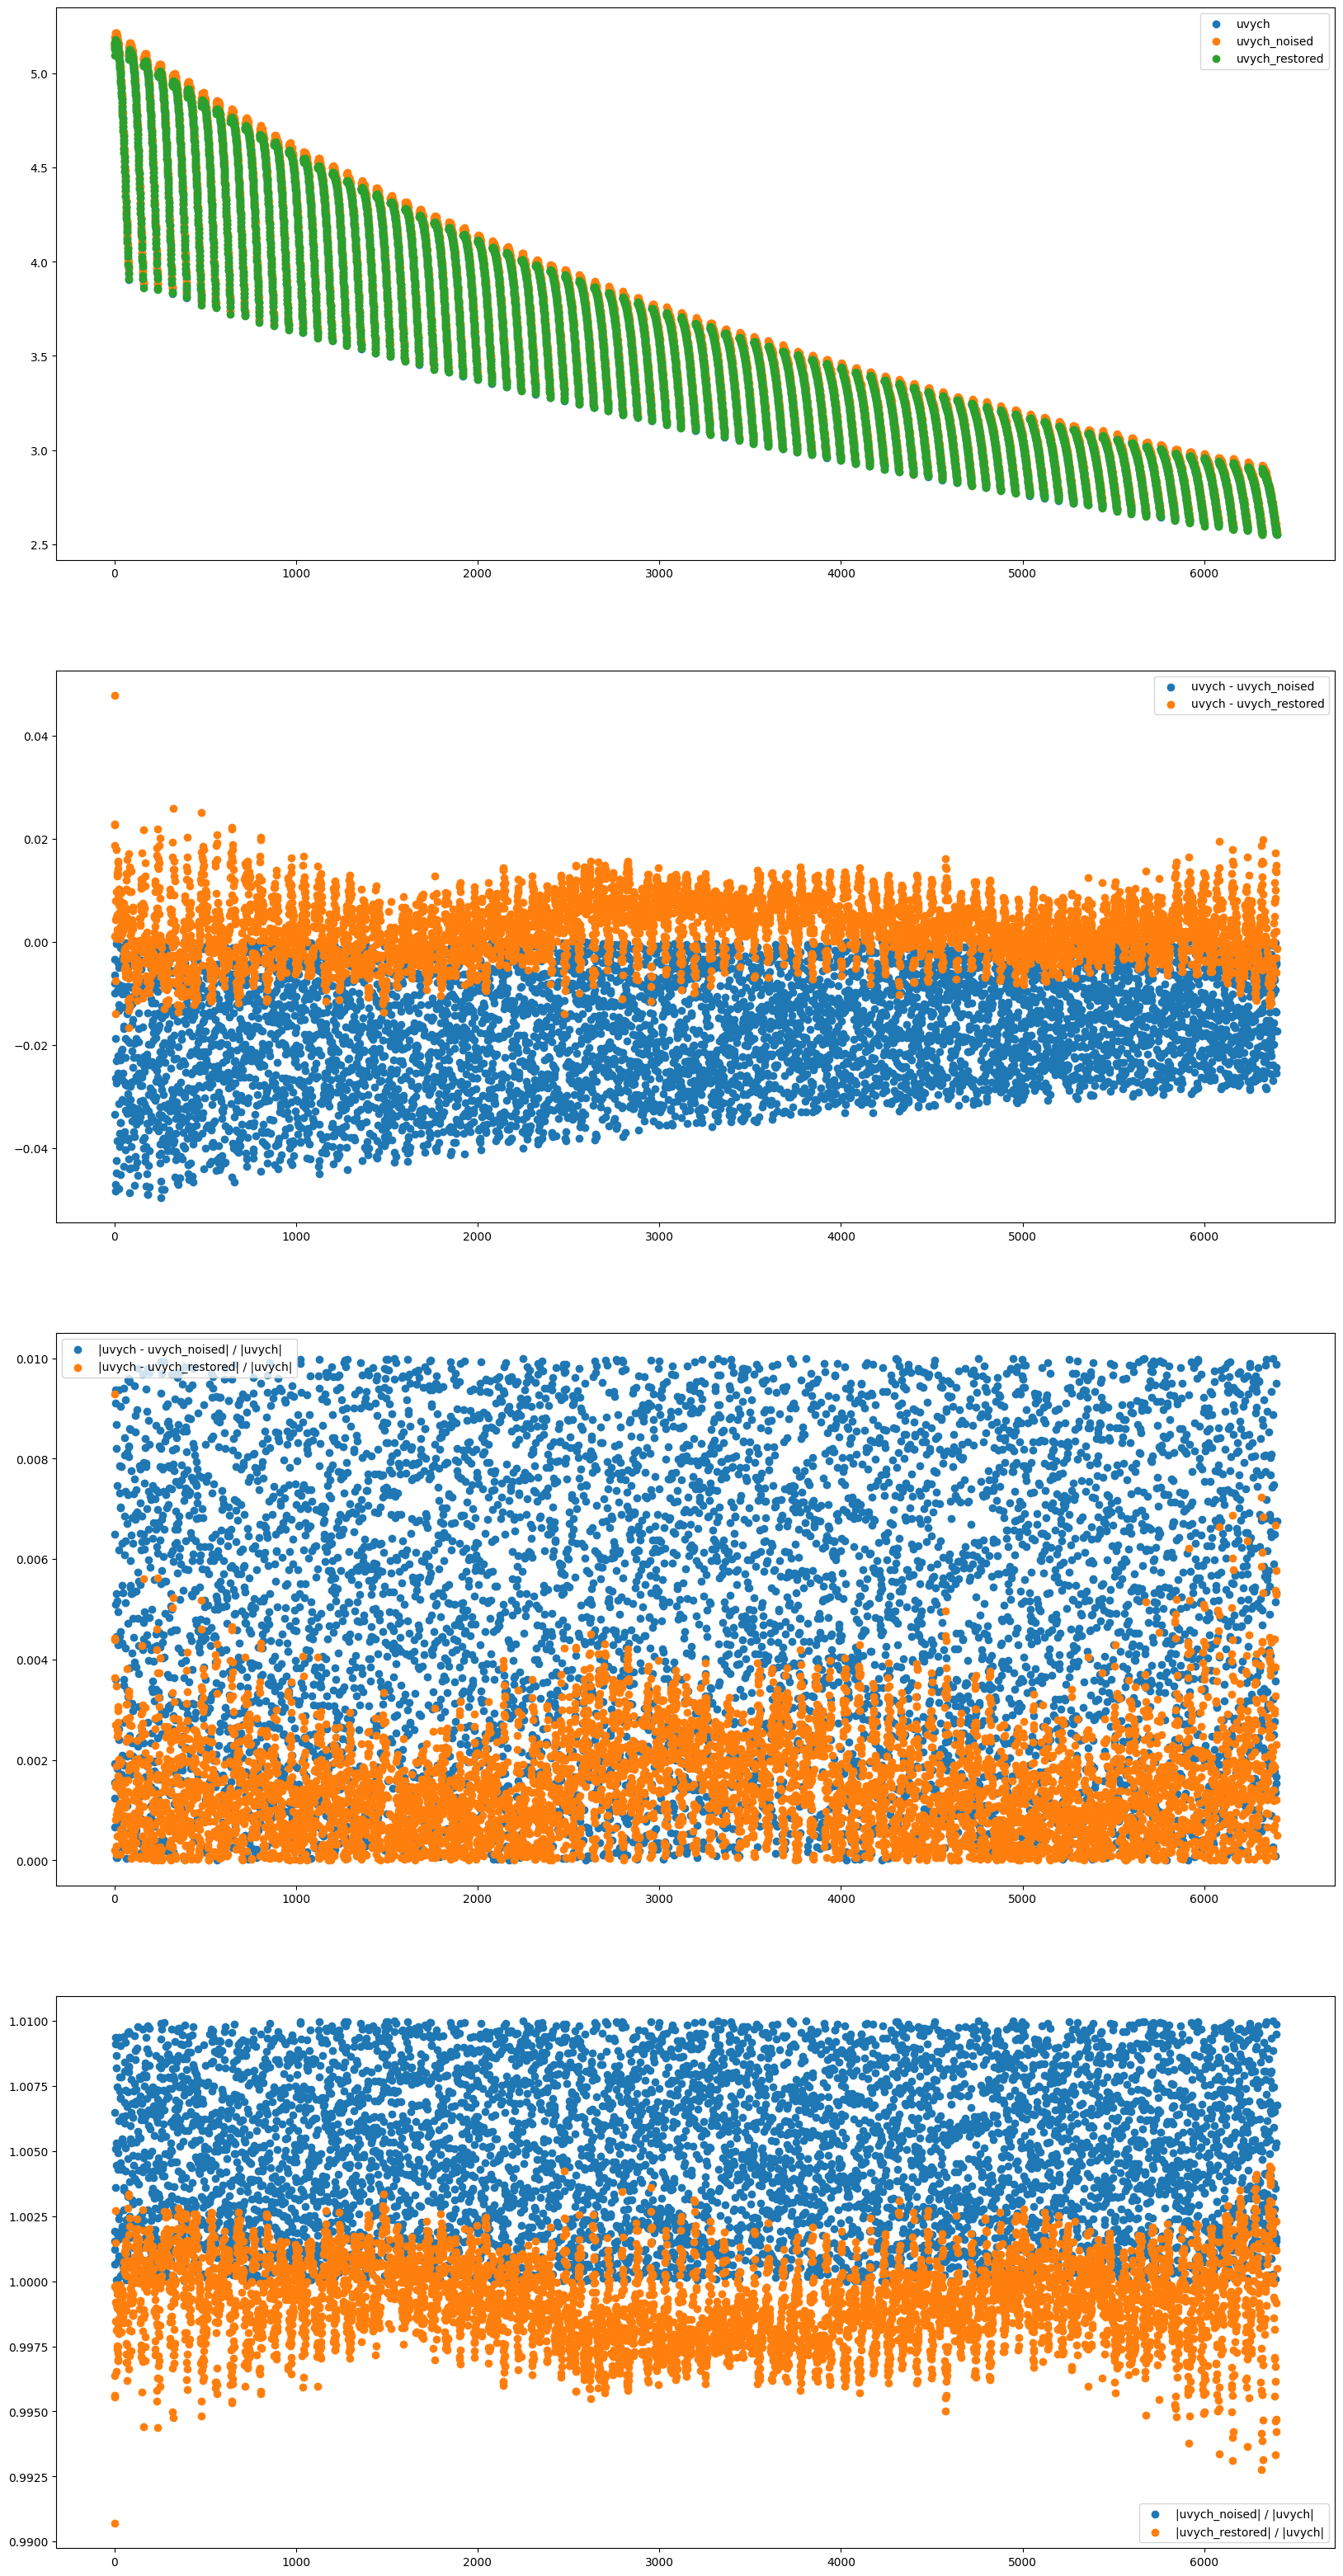

In [42]:
fig, axes = plt.subplots(4, 1, figsize=(20, 40))

x = range(80 * 80)

axes[0].scatter(x, uvych.ravel(), label="uvych")
axes[0].scatter(x, uvych_noised.ravel(), label="uvych_noised")
axes[0].scatter(x, orig.real.ravel(), label="uvych_restored")

axes[1].scatter(x, uvych.ravel() - uvych_noised.ravel(), label="uvych - uvych_noised")
axes[1].scatter(x, uvych.ravel() - orig.real.ravel(), label="uvych - uvych_restored")


axes[2].scatter(x, np.abs(uvych.ravel() - uvych_noised.ravel()) / np.abs(uvych.ravel()), label="|uvych - uvych_noised| / |uvych|")
axes[2].scatter(x, np.abs(uvych.ravel() - orig.real.ravel()) / np.abs(uvych.ravel()), label="|uvych - uvych_restored| / |uvych|")


axes[3].scatter(x, np.abs( uvych_noised.ravel()) / np.abs(uvych.ravel()), label="|uvych_noised| / |uvych|")
axes[3].scatter(x, np.abs( orig.real.ravel()) / np.abs(uvych.ravel()), label="|uvych_restored| / |uvych|")

for i in range(4):
    axes[i].legend()

In [96]:
uvych = uvych.reshape(80*80,)
uvych_noised = uvych.copy()

for i in range(len(uvych)):
    ppp = np.random.uniform(low=0, high=0.01)
    uvych_noised[i] *= (1 + ppp)
        
uvych_noised

array([5.16501192, 5.18118115, 5.17545788, ..., 2.57957059, 2.57826906,
       2.5592086 ])

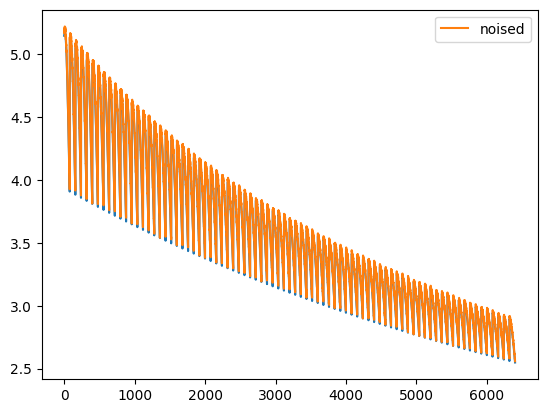

In [100]:
plt.plot(uvych)
plt.plot(uvych_noised, label="noised")
plt.legend()

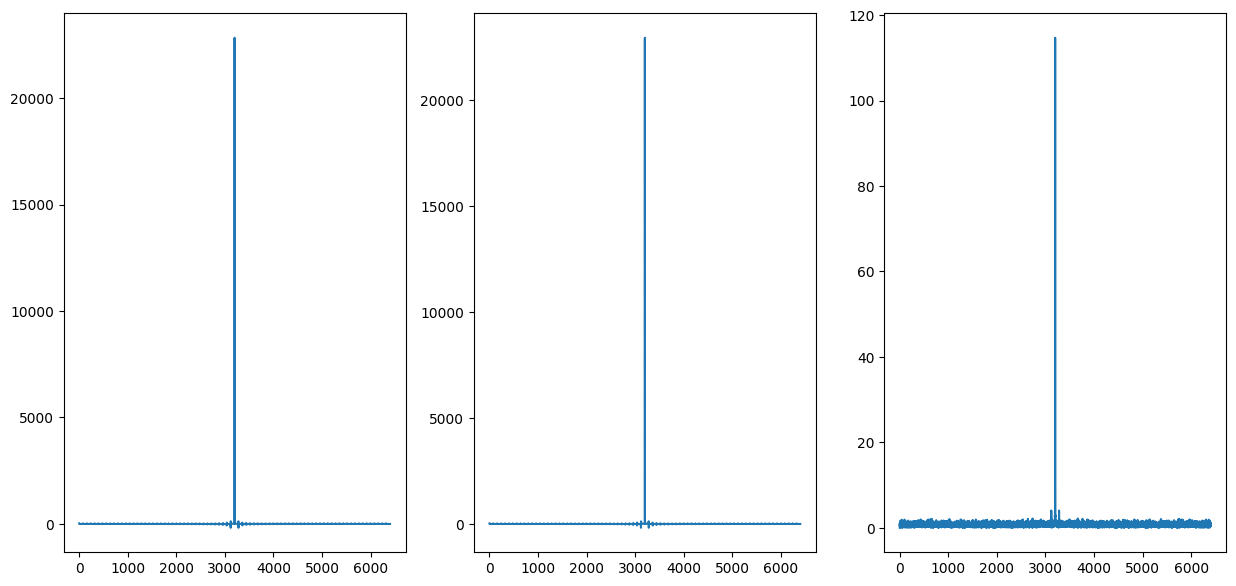

In [124]:
psd2D = (fftpack.fftshift( fftpack.fft(uvych)))
psd2D_noised = (fftpack.fftshift( fftpack.fft(uvych_noised)))
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
i1 = axes[0].plot( psd2D.real)
i2 = axes[1].plot(psd2D_noised.real)
i3 = axes[2].plot(np.abs(psd2D -  psd2D_noised ))

plt.show()

In [112]:
np.mean(psd2D[:100])

(1.3245863883010704+4.599279462386625j)

In [125]:
for i in range(len(psd2D_noised)):
    if psd2D_noised[i].real < 20:
        psd2D_noised[i] = 0.+0j

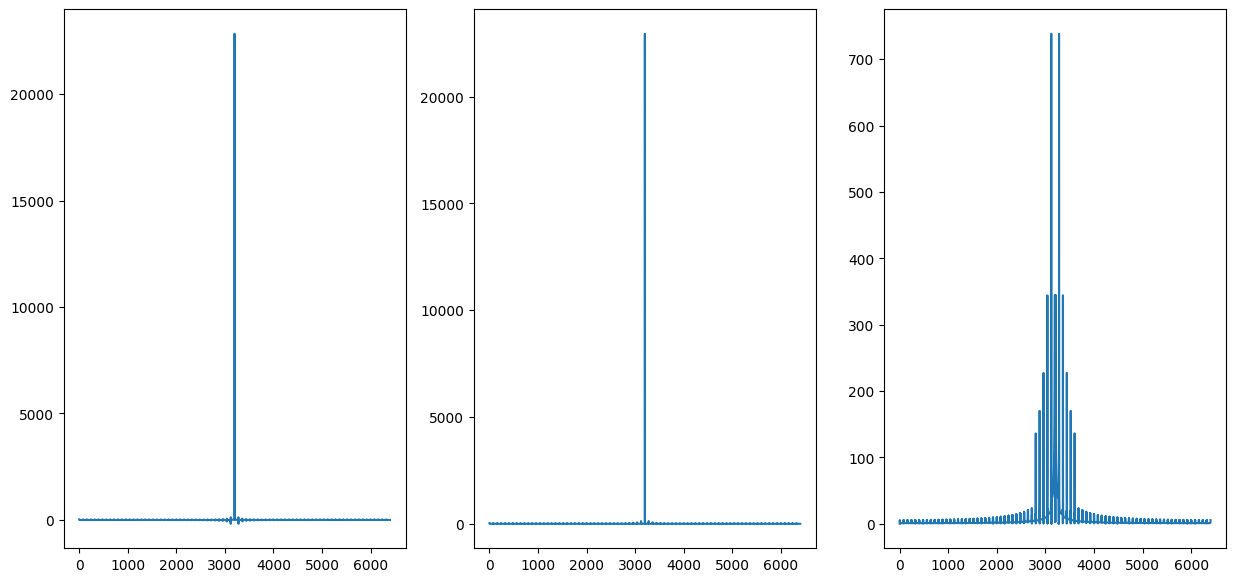

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
i1 = axes[0].plot( psd2D.real)
i2 = axes[1].plot(psd2D_noised.real)
i3 = axes[2].plot(np.abs(psd2D -  psd2D_noised ))

plt.show()

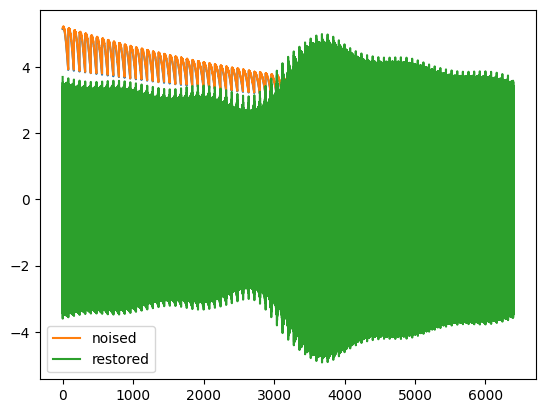

In [128]:

restored = fftpack.ifftshift(fftpack.ifft(psd2D_noised))
plt.plot(uvych)
plt.plot(uvych_noised, label="noised")
plt.plot(restored, label="restored")
plt.legend()

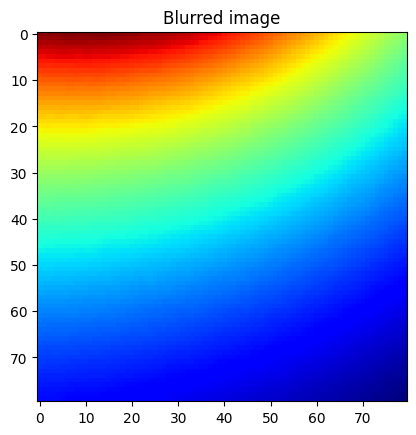

In [39]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(uvych_noised, 1)

plt.figure()
plt.imshow(im_blur, cmap="jet")
plt.title('Blurred image')

plt.show()

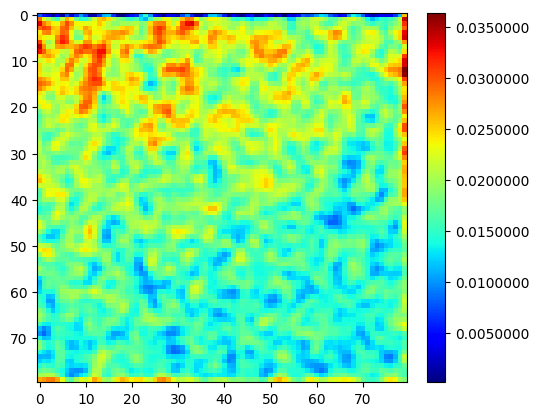

In [40]:
difference = np.abs(im_blur - uvych)
i = plt.imshow(difference, cmap="jet")
plt.colorbar(i, orientation='vertical', fraction=0.046, pad=0.04, format='%.7f')

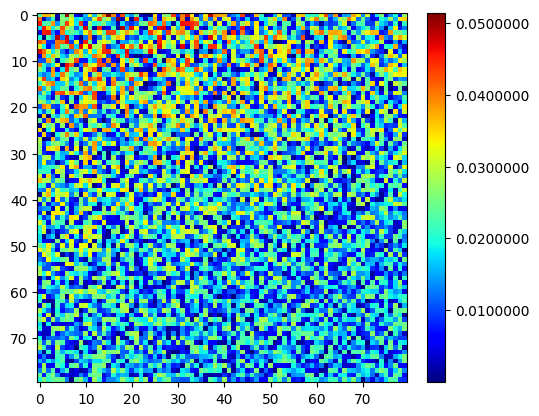

In [34]:
difference = np.abs(uvych - uvych_noised)
i = plt.imshow(difference, cmap="jet")
plt.colorbar(i, orientation='vertical', fraction=0.046, pad=0.04, format='%.7f')

In [43]:
v = np.random.uniform(low=0., high=0.003, size=uvych.shape[0])
v

array([2.31323652e-03, 1.34314385e-03, 1.66364891e-03, 2.78075241e-03,
       2.83786154e-03, 1.17193391e-03, 2.42194299e-04, 2.47584283e-03,
       1.26704769e-03, 1.35740041e-03, 1.24020517e-03, 9.89117440e-04,
       2.85609752e-03, 1.49051156e-03, 3.01447157e-04, 4.57205775e-04,
       1.27872589e-03, 8.25871414e-04, 1.60743329e-03, 8.56520296e-04,
       2.78795671e-03, 2.85598809e-03, 7.98627794e-04, 1.31748265e-03,
       2.17156369e-03, 2.33433671e-03, 4.72266027e-04, 2.73595687e-04,
       2.91799761e-03, 2.14409956e-03, 2.13258233e-03, 2.86506114e-03,
       2.32140144e-03, 1.97971855e-03, 4.50909167e-04, 2.33023821e-04,
       2.06320607e-03, 1.89789253e-04, 3.63188325e-04, 5.22807692e-04,
       1.21626142e-03, 2.45097450e-03, 1.69145055e-03, 8.18864477e-04,
       1.20369710e-03, 6.54445054e-04, 7.90619514e-05, 5.84312844e-04,
       8.92956164e-04, 1.75587169e-03, 2.23037366e-03, 1.16905243e-03,
       7.84995090e-04, 1.47589074e-03, 2.35504410e-03, 1.17275754e-03,
      

0.0


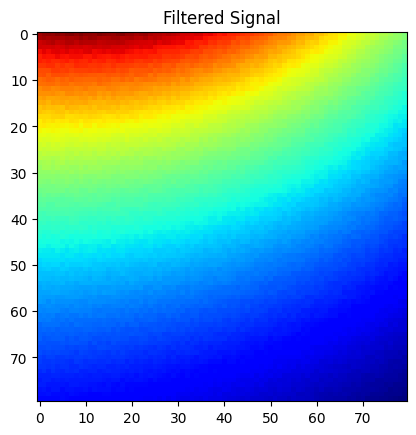

In [82]:
signal_fft = fftpack.fft2(uvych_noised)

# Define a Gaussian filter in the frequency domain
# This is a simple example; you might need to adjust the filter parameters
# to suit your specific noise characteristics
# sigma = 5 # Standard deviation for the Gaussian filter
# gaussian_filter = np.exp(-np.abs(np.fft.fftfreq(uvych_noised.shape[0]))**2 / (3.688 * sigma))

# Apply the Gaussian filter in the frequency domain
filtered_signal_fft = signal_fft 

# Compute the inverse 2D FFT to reconstruct the signal
filtered_signal = fftpack.ifft2(filtered_signal_fft)


print(np.max(np.abs(uvych - uvych_noised)) - np.max(np.abs(uvych - filtered_signal)))

plt.imshow(np.abs(filtered_signal), cmap='jet')
plt.title('Filtered Signal')
plt.show()

In [78]:
uvych_diff_fft = fftpack.fft2(uvych_noised) - fftpack.fft2(uvych)
uvych_diff_fft

array([[ 1.14137986e+02+0.j        ,  4.67416206e-02-3.82249133j,
         5.49369796e-03-2.02827942j, ...,  4.70605440e-01+1.82524121j,
         5.49369796e-03+2.02827942j,  4.67416206e-02+3.82249133j],
       [ 2.73447720e+00-9.12811308j, -6.54823824e-01-0.28989075j,
        -2.64901237e-02+0.01238025j, ..., -3.78050469e-01-1.28065733j,
         8.74118826e-02+0.87505134j,  6.64229037e-01+1.19850293j],
       [ 8.35779526e-01-4.08029429j, -1.26386032e-01+1.55764273j,
        -8.08427909e-01-0.90401654j, ..., -3.05345864e-01-0.20442917j,
         4.63667808e-01-1.03880483j,  3.91568083e-01-0.59678465j],
       ...,
       [ 8.83668678e-01+3.8306129j , -2.23839782e-01-0.0691699j ,
         3.86768475e-01+0.0827645j , ..., -1.05296378e-01+0.20994797j,
        -8.35461525e-02-0.76024359j, -3.36063642e-01-0.47201818j],
       [ 8.35779526e-01+4.08029429j,  3.91568083e-01+0.59678465j,
         4.63667808e-01+1.03880483j, ..., -6.42578768e-01+0.2386295j ,
        -8.08427909e-01+0.90401654j

0.017340380725467317
0.050311305864395806


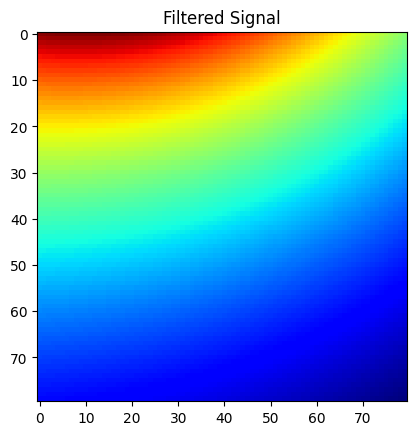

In [93]:
orig_fft = fftpack.fft2(uvych)
uvych_noised = uvych.copy()

for i in range(len(uvych)):
    for j in range(len(uvych[i])):
        ppp = np.random.uniform(low=0, high=0.01)
        orig_fft[i][j] *= (1 + ppp)
        uvych_noised[i][j] *= (1 + ppp)
        
filtered_signal = fftpack.ifft2(orig_fft)


print(np.max(np.abs(uvych - filtered_signal)))
print(np.max(np.abs(uvych - uvych_noised)))

plt.imshow(np.abs(filtered_signal), cmap='jet')
plt.title('Filtered Signal')
plt.show()

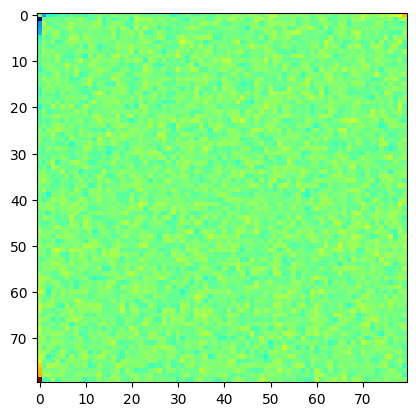

In [73]:
plt.imshow(uvych_diff_fft.imag, cmap="jet")